<a href="https://colab.research.google.com/github/aditipatil0711/SJSU_Masters_Assignments/blob/main/CMPE255_Data_Mining/Assignment8/LLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implement LLE

Dataset Used: Iris Dataset on Kaggle

 LLE is a non-linear dimensionality reduction technique, particularly useful for datasets where linear methods like PCA might not be effective in capturing the intrinsic geometry of the data.






In [ ]:
import pandas as pd
import os
from google.colab import files

In [ ]:
  # upload the file
uploaded = files.upload()

Saving Iris_Dataset.zip to Iris_Dataset.zip




### Step 1: Understanding and Preparing the Iris Dataset
- **Data Loading:** Import the Iris dataset, which is a classic dataset in machine learning, often used for testing classification algorithms.
- **Data Inspection:** Understand the structure, features, and classes in the Iris dataset.


In [ ]:
import zipfile
import os

# Path to the uploaded zip file
zip_file_path = '/content/Iris_Dataset.zip'

# Extracting the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

# Listing the contents of the extracted folder to find the dataset file
extracted_files = os.listdir('/content')
extracted_files


['.config', 'database.sqlite', 'Iris_Dataset.zip', 'Iris.csv', 'sample_data']

In [ ]:
# Re-loading the Iris dataset for inspection and analysis

# Path to the dataset file
iris_file_path = os.path.join('/content', 'Iris.csv')
iris_data = pd.read_csv(iris_file_path)

# Displaying the first few rows for an initial overview
iris_data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Data Cleaning

# Dropping the 'Id' column as it's not relevant for our analysis
iris_data_cleaned = iris_data.drop(columns=['Id'])

# Checking for missing values
missing_values_iris = iris_data_cleaned.isnull().sum()

# Summary statistics for a brief inspection of data distribution
data_summary_iris = iris_data_cleaned.describe()

missing_values_iris, data_summary_iris


(SepalLengthCm    0
 SepalWidthCm     0
 PetalLengthCm    0
 PetalWidthCm     0
 Species          0
 dtype: int64,
        SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
 count     150.000000    150.000000     150.000000    150.000000
 mean        5.843333      3.054000       3.758667      1.198667
 std         0.828066      0.433594       1.764420      0.763161
 min         4.300000      2.000000       1.000000      0.100000
 25%         5.100000      2.800000       1.600000      0.300000
 50%         5.800000      3.000000       4.350000      1.300000
 75%         6.400000      3.300000       5.100000      1.800000
 max         7.900000      4.400000       6.900000      2.500000)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Encoding the 'Species' column
label_encoder = LabelEncoder()
iris_data_cleaned['Species_encoded'] = label_encoder.fit_transform(iris_data_cleaned['Species'])

# Dropping the original 'Species' column as we now have an encoded version
iris_data_encoded = iris_data_cleaned.drop(columns=['Species'])

# Displaying the first few rows of the encoded data
iris_data_encoded.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_encoded
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


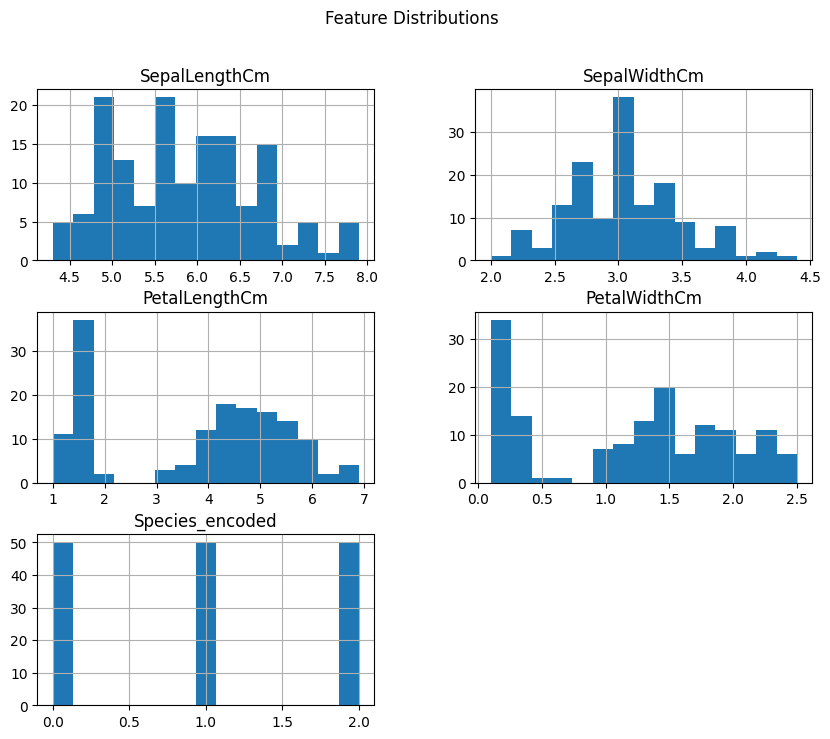

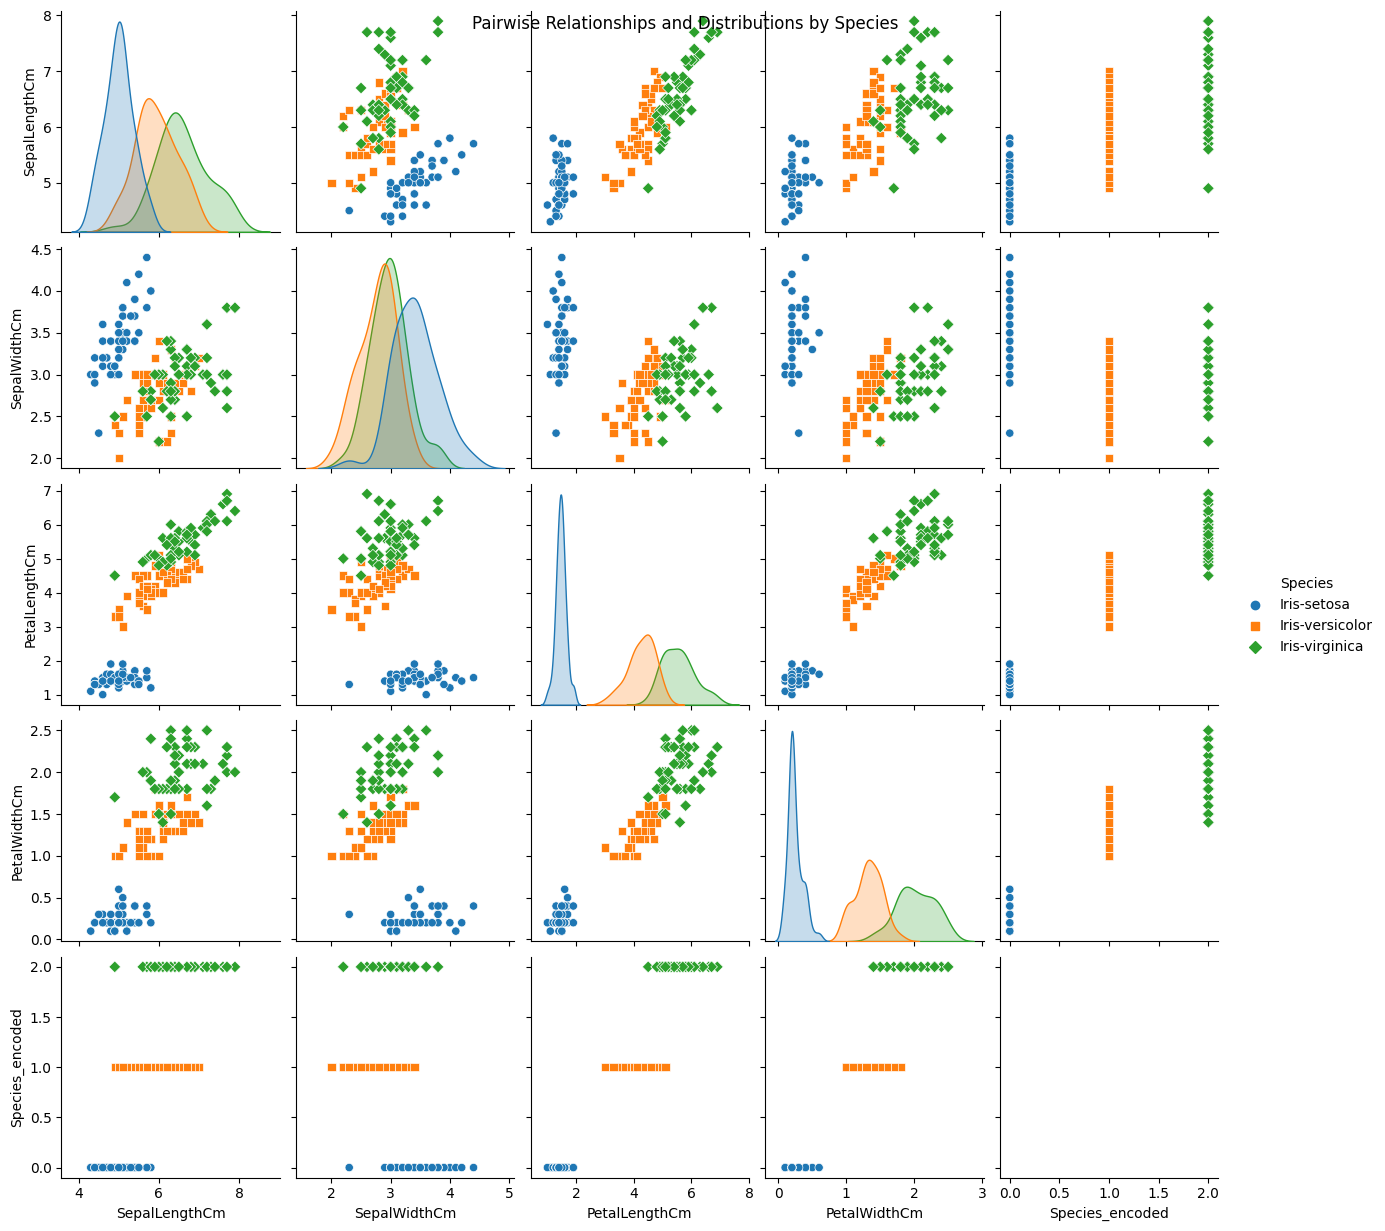

In [ ]:
# Visualizing Feature Distributions using histograms and pair plots
import matplotlib.pyplot as plt
import seaborn as sns
# Histograms for each feature
iris_data_encoded.hist(bins=15, figsize=(10, 8))
plt.suptitle('Feature Distributions')
plt.show()

# Pair plot to visualize pairwise relationships and distributions
sns.pairplot(iris_data_cleaned, hue="Species", markers=["o", "s", "D"])
plt.suptitle('Pairwise Relationships and Distributions by Species')
plt.show()



### Step 2: Implementing LLE
- **Import Libraries:** We'll require libraries like `sklearn`, specifically `sklearn.manifold.LocallyLinearEmbedding`.
- **Parameter Selection:** Choose parameters for LLE, such as the number of components (dimensions) to reduce to, and the number of neighbors.
- **Applying LLE:** Apply LLE to the Iris dataset.




In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

# Selecting parameters for LLE
n_components_lle = 2  # Reducing to 2 dimensions for visualization purposes
n_neighbors_lle = 10  # Number of neighbors to consider

# Applying LLE
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors_lle, n_components=n_components_lle)
iris_data_reduced = lle.fit_transform(iris_data_encoded.drop('Species_encoded', axis=1))

# Creating a DataFrame for the reduced data for visualization
iris_data_reduced_df = pd.DataFrame(iris_data_reduced, columns=['LLE Component 1', 'LLE Component 2'])
iris_data_reduced_df['Species'] = label_encoder.inverse_transform(iris_data_encoded['Species_encoded'])

iris_data_reduced_df.head()


,LLE Component 1,LLE Component 2,Species
0,0.0,0.0,Iris-setosa
1,0.0,0.0,Iris-setosa
2,0.0,0.0,Iris-setosa
3,0.0,0.0,Iris-setosa
4,0.0,0.0,Iris-setosa


### Step 3: Analyzing the Results
- **Visualization:** Visualize the reduced dimensions to see how the data points are distributed.
- **Interpretation:** Analyze the transformation to understand the relationships and separations among the different Iris species.


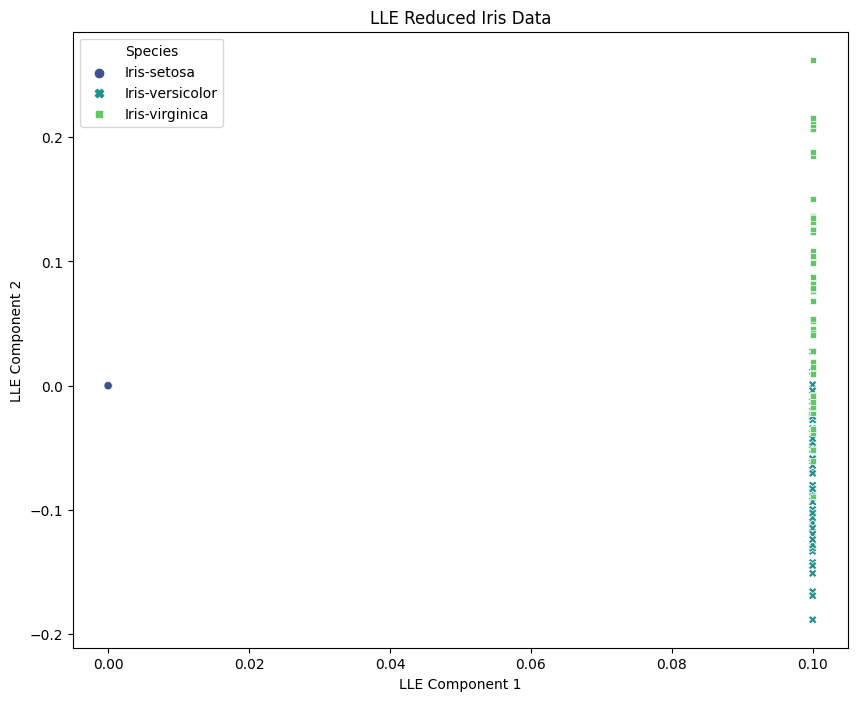

In [ ]:
# Visualizing the LLE reduced data

plt.figure(figsize=(10, 8))
sns.scatterplot(x='LLE Component 1', y='LLE Component 2', hue='Species', data=iris_data_reduced_df, style='Species', palette='viridis')
plt.title('LLE Reduced Iris Data')
plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.legend(title='Species')
plt.show()
